<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/Modern_Portfolio_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.decomposition as sk_decomp
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
ticker_list = ['HDFCBANK', 'NIFTYBEES', 'JUNIORBEES', 'GOLDBEES']
ticker_weights = [1, 3, 3, 3]

In [3]:
price_dict = {}

for ticker_name in ticker_list:
    ticker = yf.Ticker(ticker_name+".NS")

    history_df = ticker.history(period = "1y", interval = '1d')

    price_dict[ticker_name] = history_df['Close']

close_price_df = pd.DataFrame(price_dict)

In [4]:
calc_df = (
    close_price_df.join(close_price_df.shift(1), rsuffix = '_prev')
                  .dropna()
)


for ticker_name in ticker_list:
    calc_df.eval(f'r_{ticker_name} = log({ticker_name}) - log({ticker_name}_prev)', inplace = True)

rate_df = calc_df[[f'r_{ticker_name}' for ticker_name in ticker_list]]
rate_df.columns = ticker_list

<Axes: >

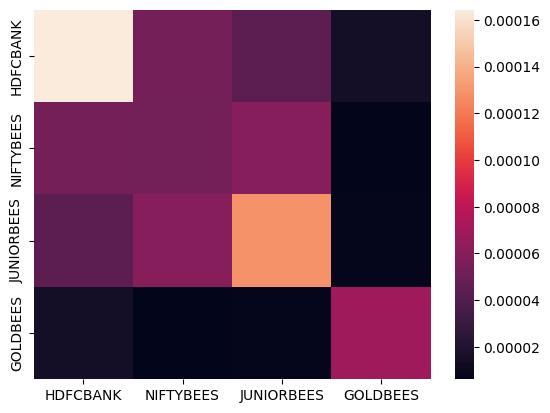

In [5]:
sns.heatmap(rate_df.cov())

In [6]:
partitions = []

for idx in range(0, 100):
    for jdx in range(0, 100 - idx):
        for kdx in range (100 - idx - jdx):
            ldx = 100 - idx - jdx - kdx
            partitions += [[idx/100, jdx/100, kdx/100, ldx/100]]

partitions_df = pd.DataFrame(partitions, columns = ticker_list)

In [7]:
mu = np.matmul(partitions_df, rate_df.mean())

In [8]:
sigma = []

for idx, row in partitions_df.iterrows():
    var = np.dot(row, np.matmul(rate_df.cov(), row))
    sigma += [np.sqrt(var)]

In [9]:
sigma_arr = np.array(sigma)

In [10]:
N = len(rate_df)

In [11]:
param_df = pd.DataFrame({
    'mu' : mu * N,
    'sigma' : sigma_arr * np.sqrt(N)
})

In [12]:
result_df = partitions_df.join(param_df)

In [16]:
result_df.eval('sr = (mu)/sigma', inplace = True)

<Axes: xlabel='sigma', ylabel='mu'>

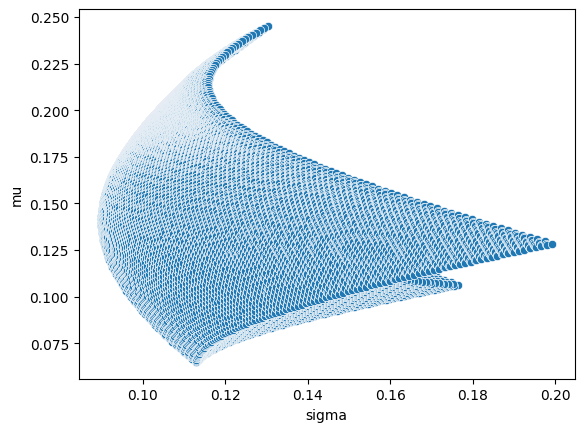

In [17]:
sns.scatterplot(x = 'sigma', y = 'mu', data = result_df)

In [18]:
result_df.query(f"sr == {result_df['sr'].max()}")

,HDFCBANK,NIFTYBEES,JUNIORBEES,GOLDBEES,mu,sigma,sr
37667,0.08,0.0,0.11,0.81,0.220337,0.113126,1.947715
